In [1]:
import scipy as sp
import numpy as np
from mayavi import mlab
from itertools import chain
import matplotlib.pyplot as plt

from ggqpy import construct_Chevyshev_quadratures
from ggqpy.functionfamiliy import Interval
from ggqpy.testproblems import example_problem, gen_poly_and_sing
from ggqpy.discretize import Discretizer
from ggqpy.compress import compress_sequence_of_functions, visualise_diagonal_dropoff, construct_A_matrix
from ggqpy.optimize import QuadOptimizer

********************************************************************************
         to build the TVTK classes (9.1). This may cause problems.
         Please rebuild TVTK.
********************************************************************************



In [2]:
max_degree = 3
functions = [[lambda theta, phi: np.cos(phi)*sp.special.sph_harm(m,n,theta,phi) for m in range(-n, n+1)] for n in range(max_degree)]
functions = list(chain(*functions))

In [3]:
disc = Discretizer()
N_disc = 100
x_disc,y_disc,w_disc,x_loc,y_loc = disc.naive_discretize2d(N_disc, Interval(0,2*np.pi), Interval(0,np.pi))

(10000, 3)


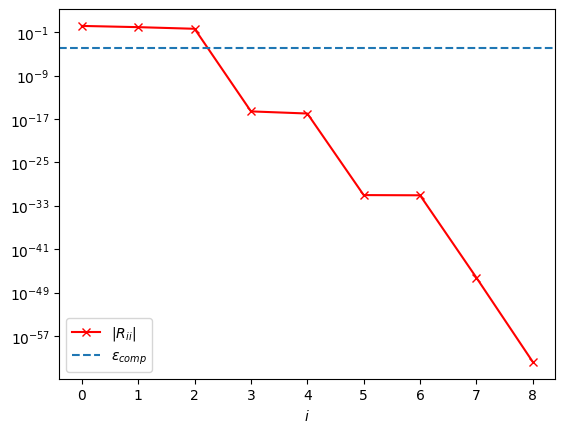

In [4]:
precision = 1e-4
U, rank = compress_sequence_of_functions(functions,(x_disc,y_disc),w_disc,precision)
print(U.shape)
A = construct_A_matrix((x_disc,y_disc),w_disc,functions)
visualise_diagonal_dropoff(A,precision)

In [5]:
(x_cheb,y_cheb),w_cheb = construct_Chevyshev_quadratures((x_disc,y_disc),w_disc,U)

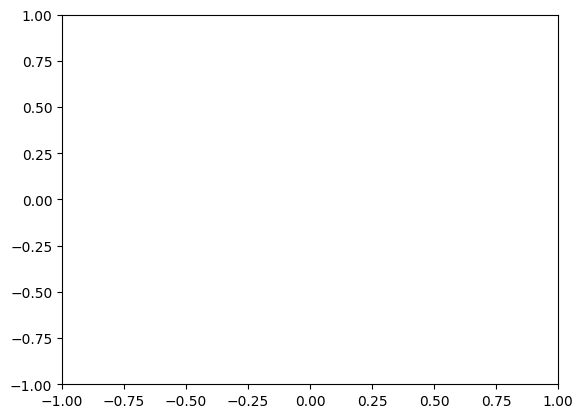

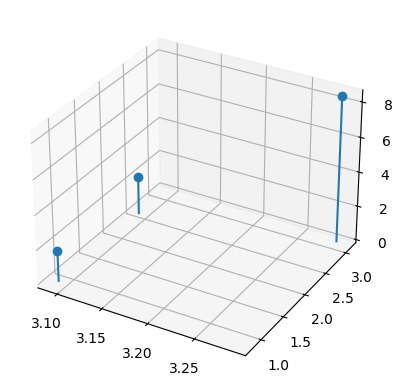

(-9.09183634250623e-14+1.0911425486359079e-16j)


In [19]:
plt.plot(x_cheb,y_cheb,"rx")
plt.xlim(-1,1);
plt.ylim(-1,1);
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
markerline, stemlines, baseline = ax.stem(x_cheb, y_cheb, w_cheb.real, basefmt=" ")
plt.show()
print(np.cos(y_cheb)@w_cheb)

In [22]:
fl = lambda x,y: sp.special.sph_harm(0,0,x,y)
print((np.cos(y_disc)*fl(x_disc,y_disc))@w_disc)

(-2.470598595497031e-14+0j)
